# Проект 3. Анализ рынка недвижимости

**Задача исследования**

- Установить параметры  для определения цены объектов недвижимости и выявить закономерности ценообразования. 

**Описание данных**

- `airports_nearest`— расстояние до ближайшего аэропорта в метрах (м)   
- `balcony` — число балконов  
- `ceiling_height` — высота потолков (м)    
- `cityCenters_nearest` — расстояние до центра города (м)   
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
- `first_day_exposition` — дата публикации  
- `floor` — этаж  
- `floors_total` — всего этажей в доме  
- `is_apartment` — апартаменты (булев тип)  
- `kitchen_area` — площадь кухни в квадратных метрах (м²)  
- `last_price` — цена на момент снятия с публикации  
- `living_area` — жилая площадь в квадратных метрах (м²)  
- `locality_name` — название населённого пункта  
- `open_plan` — свободная планировка (булев тип)  
- `parks_around3000` — число парков в радиусе 3 км  
- `parks_nearest` — расстояние до ближайшего парка (м)  
- `ponds_around3000` — число водоёмов в радиусе 3 км  
- `ponds_nearest` — расстояние до ближайшего водоёма (м)  
- `rooms` — число комнат  
- `studio` — квартира-студия (булев тип)  
- `total_area` — общая площадь квартиры в квадратных метрах (м²)  
- `total_images` — число фотографий квартиры в объявлении 


**Ход исследования**

1. Проведем обзор данных и составим первое представление об имеющихся данных, оценим их объем, тип и качество.
2. Выполним предобработку данных. Проверим данные на возможные ошибки, аномалии, пропуски и дубликаты. Исправим данные, критичные для нашего исследования. Оценим достаточность данных для исследования и при необходимости, проведем преобразования данных путем добавления их в новые колонки датафрейма.
3. Выполним исследование данных. Определим параметры, которые позволять реализовать цель нашего исследования.
4. Подведем  итоги исследования и сформулируем общий вывод.

 ## Обзор данных

Импортируем библиотеки, которые нам потребуются для обработки и визуализации данных:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

Загрузим с ресурса файл. Для корректного представления данных используем `\t` в параметре `sep`. Сохраним датафрейм в переменной `df` и выведем на экран 7 первых строк. 

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
pd.set_option('max_columns', None)
df.head(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


Данные корректно распределены по колонкам.  Предварительно уже видим наличие пропущенных значений в нескольких столбцах (NaN), формат отображения даты в столбце `first_day_exposition` требует корректировки.      

С помощью метода `info()` запросим общую информацию о данных, изучим столбцы и их типы.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца и 23699 строк.  
4 типа данных: bool(2), float64(14), int64(3), object(3).  
В части столбцов отличается количество значений, значит, в этих столбцах присутствуют пропуски данных. Названия некоторых столбцов введены с нарушением стиля (заглавные буквы, отсутствует "змеиный регистр").
В столбце `first_day_exposition` тип данных object из-за неправильного отображения даты. В столбце `is_apartment` предположительно должны быть булевы значения, но из-за пропусков тип данных определяется как object. Именные (строковые) значения у нас только в столбце `locality_name` - тип данных соответствует.

Исправлением типов данных и формата займемся на следующем этапе.

Более полное представление о наполнении нашего дата фрейма мы сможем получить с помощью гистограмм по столбцам с числовыми значениями. Построим гистограммы на 50 "корзин" для большей детализации:

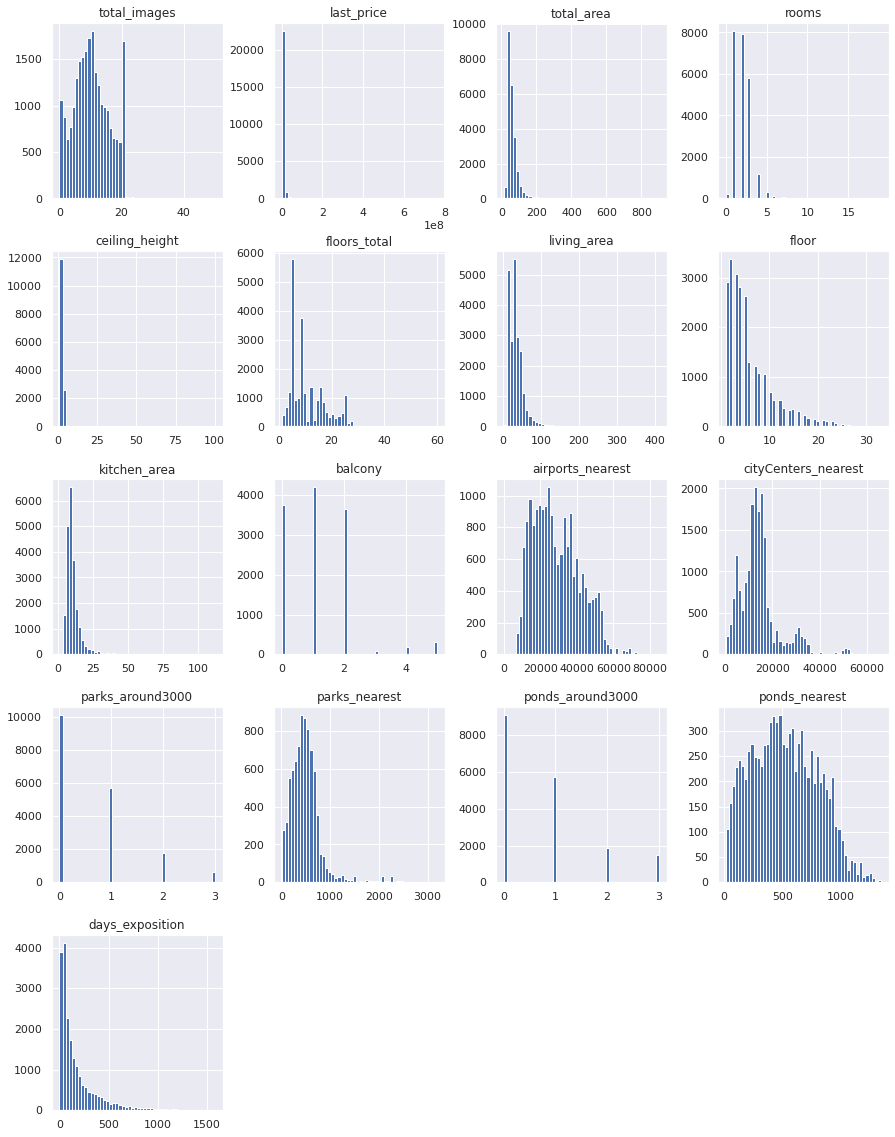

In [4]:
df.hist(bins=50, figsize=(15, 20))
plt.show()

У нас получилось 17 гистограмм, по которым мы можем составить первичное более детальное представление о данных:  

`total_images` - большинство объявлений сопровождается 7-13 фотографиями или 20 фото - 2 явных пика, есть выбросы до 50 фото.   
`last_price` цена недвижимости в большинстве случаев до 10 млн., но есть выбросы до 800 млн.   
`total_area` площадь недвижимости чаще не превышает 100 м2, но есть и крупные объекты 800-900 м2.   
`rooms`  большинство объектов до 5 комнат, чаще 1-2 комнаты, есть незначительные выбросы до 20-ти.  
`ceiling_height` высота потолков чаще до 3-4 метров, но есть выбросы до 100 м, это  однозначно потребует проверки данных на аномалии.  
`floors_total` Этажность зданий в большинстве распределена до 35 этажей, с некоторыми выбросами до 60, что требует проверки (по данным интернет ресурсов самый высокий жилой дом в СПб 37 этажей). Наиболее распространенная этажность объектов - 5 и 9 этажей.   
`living_area` жилая площадь наших объектов чаще от 15 до 60 м2, с выбросами до 400 м2.   
`floor` - больше объявлений с размещением квартир на 1 - 5 этажах, с постепенным убыванием количества до 35 этажей.      
`kitchen_area` - чаще встречается площадь кухни от 5 до 15 м2. И есть выбросы до 100.   
`balcony` балконов у нас не более 5, чаще 1-2 балкона или балкон отсутствует, тип данных по столбцу есть смысл заменить на int8.   
`airports_nearest` большинство объектов недвижимости находятся в пределах 12-40 км от аэропорта, с постепенным убыванием количества до 90 км.   
`cityCenters_nearest` - большинство объектов находятся от центра города в пределах 10-18 км. Есть небольшой пик около 30 км., и выбросы до 70 км.   
`parks_around3000` в пределах 3-х км чаще отсутствуют парки, или их не более 3-х. Тип данных в этом столбце целесообразно заменить на int8.   
`parks_nearest` большинство отмеченных парков расположено в пределах 800 м.     
`ponds_around3000` в пределах 3-х км чаще отсутствуют водоемы, или их не более 3-х. (Аналогично паркам). Тип данных в этом столбце целесообразно заменить на int8.  
`ponds_nearest` большинство отмеченных водоемов расположено в пределах 1 км.   
`days_exposition` большинство объявлений было размещено примерно по полгода, до 200 дней


Дополнительно посмотрим на статистику по нашим данным.

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В описательной статистике по столбцам можно обратить внимание на некоторые аномальные значения, в частности в столбце`ceiling_height` min выстота потолков составляет 1 м, а max - 100 м, это аномальные значения. В столбце `floors_total`  максимальное количество этажей 60, что вызывает сомнения. Есть объекты состоящие из 0 комнат, что тоже является аномалией. Существенные различия между средним и медианным значениями показывает наличие выбросов в данных по соответствующим столбцам. Это мы видели и по нашим гистограммам. Таблица позволяет получить более точные представления о среднем, медиане, квартилях, максимуме, минимуме, увидеть наличие пропусков (count) - отличия от количества строк в датафрейме. 

**Вывод**

- В нашем датафрейме 22 столбца и 23699 строк. 
- 4 типа данных: bool(2), float64(14), int64(3), object(3), часть типов мы исправим или поменяем на наиболее оптимальные. 
- Некорректно отображена дата.
- В данных присутствуют пропуски (14 столбцов).
- Есть аномальные значения и выбросы (увидели при просмотре гистограмм и статистической таблицы).
- Названия некоторых столбцов нужно скорректировать и привести в соответствие стилю.

На следующем этапе исправим наши данные, скорректируем несоответствия, заполним пропуски, детально посмотрим на аномальные значения, проверим на явные и неявные дубликаты.

## Предобработка данных

###  Исправим стиль и формат данных

Приведем названия столбцов в соответствие со стилем, несоответствия есть в названиях столбцов:

`cityCenters_nearest`  -> `city_centers_nearest`   
`parks_around3000`  -> `parks_around_3000`   
`ponds_around3000`  -> `ponds_around_3000`

In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Перезапишем корректные названия столбцов, строго соблюдая их количество и порядок

In [7]:
df.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition']
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Проверили список названий столбцов после изменений и убедились, что наши изменения корректны.  

**Следующим шагом приведем отображение даты в надлежащий формат**

In [8]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Вывели 5 верхних строк датафрейма, убедились, что дата отражена корректно.

**Выведем доли пропущенных значений для каждого столбца.**

In [9]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around_3000       0.232837
parks_around_3000       0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

В 14 столбцах есть пропущенные значения. В некоторых из них пропуски в данных составляют значительные объемы, например: ~88%  в столбце `is_apartment`, ~66%  в столбце `parks_nearest`. 

Пропуски могли появиться по разным причинам:
- при подаче объявления человек мог не указать какие-то данные;
- могли быть потери данных при сборе, хранении или выгрузке;
- не было вариантов для выбора (например, в радиусе 3 км от объекта недвижимости нет парков или водоемов, поэтому расстояние могло остаться незаполненным)

### Исследуем данные в столбцах с пропусками и примем решение о заполнении пропущенных значений.

В столбце `floors_total` пропуски составляют 0,34%. Либо данные не были заполнены, либо потерялись по техническим причинам. Аналогично, в столбце `locality_name` отсутствует 0,2% значений, вероятнее всего, причина их отсутствия носит технический характер, их заполнить на основании наших данных нечем. Удалим такие строки:

In [10]:
df = df.dropna(subset=['floors_total', 'locality_name'])
df.shape

(23565, 22)

После удаления пропусков  `floors_total` в датафрейме осталось 23565 строк

В столбце `ceiling_height` пропущено ~39% данных, целесообразно заметить пропущенные значения медианой, из таблицы  описательной статистики медиана у нас составляет 2,65 м. Выполним заполнение пустых значений через метод `fillna`

In [11]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

Проверка показала, что пропуски в столбце с высотой потолков заполнены.

Посмотрим на столбец `is_apartment`, выведем уникальные значения и их количество:

In [12]:
df.is_apartment.value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Данные заполнены булевыми значениями, `True` -> объект является апартаментами или не является -> `False`. Вероятнее всего, если данные не заполнены, значит, объект недвижимости не является апартаментами. Заменим все пропуски на `False`.

In [13]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df.is_apartment.value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

По изменившемуся количеству False видим, что замена прошла успешно.

В столбце `balcony` 48,6% пропусков. Если поле осталось пустым, вероятнее всего балкон в объекте недвижимости отсутствует. Заменим пропуски на `0.0`. Аналогично в столбцах `parks_around_3000`, `ponds_around_3000` пустые поля составляют ~23%. Здесь пропуски, с наибольшей долей вероятности, означают отсутствие парков и водоемов в радиусе 3 км, соответственно, в этих столбцах пропуски можно заменить на `0.0`. Проведем замену пропусков в этих столбцах и сразу же заменим тип данных на `int8`:

In [14]:
df[['balcony', 'parks_around_3000', 'ponds_around_3000']] = \
df[['balcony', 'parks_around_3000', 'ponds_around_3000']].fillna(0).astype(np.int8)

Пропуски в столбцах `living_area` и `kitchen_area` заполним через медианное значение процентного отношения к общей площади. Для этого сделаем срез по столбцам `total_area`, `living_area`,  и `kitchen_area`  без пропусков

In [15]:
df_area = df[['total_area', 'living_area', 'kitchen_area']].dropna()
df_area.head()

,total_area,living_area,kitchen_area
0,108.0,51.0,25.0
1,40.4,18.6,11.0
2,56.0,34.3,8.3
4,100.0,32.0,41.0
5,30.4,14.4,9.1


In [16]:
df_area.shape

(20905, 3)

Мы получили таблицу из 20905 строк. Добавим в нее новые столбцы:   
 - living_share - посчитаем долю жилой площади в общей площади объекта недвижимости 
 - kitchen_share - посчитаем долю площади кухни в общей площади

In [17]:
df_area['living_share'] = df_area['living_area'] / df_area['total_area']

In [18]:
df_area['kitchen_share'] = df_area['kitchen_area'] / df_area['total_area']
df_area.head()

,total_area,living_area,kitchen_area,living_share,kitchen_share
0,108.0,51.0,25.0,0.472222,0.231481
1,40.4,18.6,11.0,0.460396,0.272277
2,56.0,34.3,8.3,0.612500,0.148214
4,100.0,32.0,41.0,0.320000,0.410000
5,30.4,14.4,9.1,0.473684,0.299342


Новые столбцы добавлены, теперь высчитаем по каждому из них медианную долю и запишем в переменные:

In [19]:
living_share_median = df_area['living_share'].median()
living_share_median

0.5666666666666667

In [20]:
kitchen_share_median = df_area['kitchen_share'].median()
kitchen_share_median

0.171875

Мы получили медианные доли, которые занимают жилая площадь и кухня в общей площади и заполним наши пропуски в столбцах `living_area` и `kitchen_area` путем умножения данных из столбца `total_area` на медианные доли `living_share_median` и `kitchen_share_median`

In [21]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * living_share_median)
df['living_area'].isna().sum()

0

In [22]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_share_median)
df['kitchen_area'].isna().sum()

0

Через isna() убедились, что все пропуски в столбцах `living_area` и `kitchen_area` заполнены 

Столбцы с расстоянием до ближайшего парка `parks_nearest` и водоема `ponds_nearest` содержат пропуски в связи с тем, что в радиусе 3-х км эти объекты отсутствуют. Соответственно, здесь мы можем указать любое расстояние, свыше 3-х км, например, установим 5000 м, т.к. у нас в этом столбце данные хранятся в метрах. И запомним, что на 5000 мы заменили пропуски. 

In [23]:
df[['parks_nearest', 'ponds_nearest']] = df[['parks_nearest', 'ponds_nearest']].fillna(5000)

Поменяем тип данных в столбце `floors_total`, это натуральное число, установим вместо *float* *int*.

In [24]:
df['floors_total'] = df['floors_total'].astype('int')

### Обработаем дубликаты

#### Проверим датафрейм на явные дубликаты.

In [25]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.   
Проверим изменения в типах данных после обработки пропусков и корректировки форматов. Выведем информацию о нашем датафрейме через метод `info()` 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Добавился 1 столбец с типом данных `bool`, появился столбец `datetime64`, остался 1 столбец `object`, появилось 3 столбца с типом данных `int8`. Memory usage снизилась с 3,7+ МВ до 3.2+ МВ.

Осталось еще 3 столбца с незаполненными значениями:   
`days_exposition` - пропуск возможен из-за того, что на момент выгрузки данных объявление не было снято, либо не продана недвижимость на тот момент, либо  человек забыл снять объявление. А возможны и технические причины. Пустоты в этом столбце пока оставим.   
Столбцы `airports_nearest` и `city_centers_nearest` содержат картографические данные, их заполнять не будем, т.к. мы не сможем их восстановить с необходимой точностью, оставим как есть.   

#### Проверим датафрейм на неявные дубликаты.

Выполним проверку столбца `locality_name` на неявные дубликаты.

In [27]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Внушительный список населенных пунктов. Что сразу бросается в глаза, это использование "е / ё" в слове "поселок". Заменим букву ё на е.

In [28]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [29]:
df['locality_name'].value_counts()

Санкт-Петербург           15651
поселок Мурино              552
поселок Шушары              439
Всеволожск                  398
Пушкин                      369
                          ...  
деревня Борисова Грива        1
поселок Красносельское        1
деревня Хапо-Ое               1
поселок Севастьяново          1
деревня Тойворово             1
Name: locality_name, Length: 330, dtype: int64

Из данных столбца `locality_name` сформируем 2 столбца:   

`area_type` выделим тип населенного пункта;   
`area_name` извлечем название населенного пункта

In [30]:
df['area_type'] = df['locality_name'].fillna('').apply(lambda title: ' '\
                 .join(word for word in title.split(' ') if word.islower()))

In [31]:
df.groupby('area_type')['locality_name'].agg('count')

area_type
                                             19934
городской поселок                              186
деревня                                        944
коттеджный поселок                               3
поселок                                       2083
поселок 69-й километр                            1
поселок городского типа                        309
поселок городского типа имени                   53
поселок при железнодорожной станции              2
поселок станции                                 13
садоводческое некоммерческое товарищество        1
садовое товарищество                             4
село                                            32
Name: locality_name, dtype: int64

У нас получились некие группы, которые еще можно укрупнить:   
- "городской поселок", "поселок городского типа имени" переименуем в "поселок городского типа";
- "поселок 69-й километр" в "поселок";
- "садоводческое некоммерческое товарищество" в "садовое товарищество";
- "поселок при железнодорожной станции" в "поселок станции";
- незаполненные ячейки заполним типом "город".

In [32]:
df['area_type'] = df['area_type'].replace({'поселок 69-й километр': 'поселок',\
                                           'садоводческое некоммерческое товарищество': 'садовое товарищество',\
                                           'городской поселок': 'поселок городского типа', \
                                          'поселок городского типа имени': 'поселок городского типа',\
                                          'поселок при железнодорожной станции': 'поселок станции'})

In [33]:
df['area_type'] = df['area_type'].replace('', 'город')

Сгруппируем датафрейм по столбцу `area_type`:

In [34]:
df.groupby('area_type')['locality_name'].agg('count').sort_values(ascending = False)

area_type
город                      19934
поселок                     2084
деревня                      944
поселок городского типа      548
село                          32
поселок станции               15
садовое товарищество           5
коттеджный поселок             3
Name: locality_name, dtype: int64

Получили 8 типов населенных пунктов, преобладает тип "город".  

Столбец `locality_name` оставим без изменений. Его данные скопируем в столбец `area_name`, создадим вспомогательный столбец `area_name_list`, где данные `locality_name` запишем в формате строки и далее извлечем из него последний элемент по индексу [-1] и перезапишем название населенного пункта в столбец `area_name`.

In [35]:
df['area_name'] = df['locality_name']

In [36]:
df['area_name_list'] = df['locality_name'].str.split()

In [37]:
for i in range(len(df)):
    df['area_name'].iloc[i] = df['area_name_list'].iloc[i][-1]

In [38]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_type,area_name,area_name_list
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,город,Санкт-Петербург,[Санкт-Петербург]
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0,5000.0,0,5000.0,81.0,поселок,Шушары,"[поселок, Шушары]"
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,город,Санкт-Петербург,[Санкт-Петербург]
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.1,9,False,False,False,27.328125,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,город,Санкт-Петербург,[Санкт-Петербург]
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,город,Санкт-Петербург,[Санкт-Петербург]


Столбец `area_name` добавлен в нашу таблицу и содержит названия населенных пунктов, без указания типов, теперь удалим временный столбец `area_name_list`.

In [39]:
df = df.drop(columns=['area_name_list'], axis=1)

In [40]:
df.area_name.unique().shape

(294,)

У нас 294 уникальных населенных пункта.
Сгруппируем данные по Имени и соответствующим Типом населенного пункта

In [41]:
df.groupby(['area_name','area_type'])['locality_name'].agg('count').sort_values(ascending = False)

area_name        area_type           
Санкт-Петербург  город                   15651
Мурино           поселок                   552
Шушары           поселок                   439
Всеволожск       город                     398
Пушкин           город                     369
                                         ...  
Рахья            садовое товарищество        1
Рапполово        деревня                     1
Корнево          поселок станции             1
Раздолье         деревня                     1
километр         поселок                     1
Name: locality_name, Length: 317, dtype: int64

В сводной таблице получилось 317 строк. Поскольку уникальных Имен у нас 294, очевидно есть задвоенные названия, т.е. у одного населенного пункта указаны разные типы, избавимся от этого задвоения. Для этого сформируем сводную таблицу с уникальными населенными пунктами и запишем ее в переменную *area_type_uniq*:

In [42]:
df['area_name'] = df['area_name'].replace({'километр': '69-й километр'})

In [43]:
area_type_uniq = df.pivot_table(index='area_name', values='area_type', aggfunc='first').reset_index()

In [44]:
area_type_uniq.head()

,area_name,area_type
0,69-й километр,поселок
1,Агалатово,деревня
2,Александровская,поселок
3,Алексеевка,поселок
4,Аннино,поселок


Добавим уникальные типы населенных пунктов по названиям населенных пунктов в нашу основную таблицу через метод `merge()`

In [45]:
df = df.merge(area_type_uniq, on='area_name', how='left')
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_type_x,area_name,area_type_y
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,город,Санкт-Петербург,город
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,5000.0,0,5000.0,81.0,поселок,Шушары,поселок


Обновленные данные записались. 
Удалим лишний теперь столбец `area_type_x` и переименуем `area_type_y` снова в  `area_type`

In [46]:
df = df.drop(columns=['area_type_x'], axis=1)

In [47]:
df = df.rename(columns={'area_type_y': 'area_type'})
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_name,area_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,город
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,5000.0,0,5000.0,81.0,Шушары,поселок


Проверим через группировку по `['area_name','area_type']`, у нас должно остаться 294 уникальных населенных пункта и проверим детально на одном из населенных пунктов, где были задвоенные названия: поселок Рябово» и «поселок городского типа Рябово»

In [48]:
df.groupby(['area_name','area_type'])['locality_name'].agg('count').sort_values(ascending = False)

area_name        area_type
Санкт-Петербург  город        15651
Мурино           поселок        586
Кудрово          деревня        470
Шушары           поселок        439
Всеволожск       город          398
                              ...  
Пельгора         деревня          1
Сижно            деревня          1
Высокоключевой   поселок          1
Петро-Славянка   поселок          1
69-й километр    поселок          1
Name: locality_name, Length: 294, dtype: int64

In [49]:
df.query('area_name == "Рябово"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_name,area_type
1606,5,1850000.0,71.5,2017-08-01,3,2.55,5,42.7,3,False,False,False,8.5,0,поселок Рябово,NaN,NaN,0,5000.0,0,5000.0,49.0,Рябово,поселок
3912,2,1600000.0,40.0,2015-12-10,1,2.65,4,18.0,4,False,False,False,12.0,0,поселок городского типа Рябово,NaN,NaN,0,5000.0,0,5000.0,199.0,Рябово,поселок
6431,14,1850000.0,73.0,2016-01-13,3,2.55,5,42.7,3,False,False,False,8.3,0,поселок Рябово,NaN,NaN,0,5000.0,0,5000.0,1100.0,Рябово,поселок
11056,15,1250000.0,37.4,2017-06-13,1,2.75,3,18.9,2,False,False,False,10.0,0,поселок городского типа Рябово,NaN,NaN,0,5000.0,0,5000.0,647.0,Рябово,поселок


Видим, `area_type` везде отмечен "поселок".

#### Проверим данные на аномальные значения
На этапе ознакомления с данными в  столбцах `floors_total` и `ceiling_height`мы заметили нетипичные значения, посмотрим на эти столбцы более детально.

Выведем уникальные значения в столбце `ceiling_height`:

In [50]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Высота потолков менее 2,4 м и более 4.0 м. /или 6 м для двухуровневых квартир/ является аномалией (согласно норм жилищного строительства). У части значений, очевидно, не отделены десятые доли метра, например 25м -> 2.5м. А высота 22.6м, очевидно, указана лишняя цифра "2" -> 2.6. Значения 24-32м следует поделить на 10.  Посчитаем самую частую высоту потолков в датафрейме:

In [51]:
df['ceiling_height'].value_counts()

2.65     9758
2.50     3515
2.60     1645
2.70     1571
3.00     1108
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [52]:
print('Количество объектов с аномальной высотой потолков' \
      , len(df.query('ceiling_height < 2.4' and 'ceiling_height > 6.0')))
print()
print('Доля объектов с аномальной высотой потолков:', \
      len(df.query('ceiling_height < 2.4' and 'ceiling_height > 6.0')) / len(df) *100,'%')

Количество объектов с аномальной высотой потолков 29

Доля объектов с аномальной высотой потолков: 0.12306386590282198 %


Аномалии заменим на самую частую высоту - 2,65м. Напишем функцию и применим ее к столбцу ceiling_height:

In [53]:
def optimal_height(height):
    '''Функция для замены
    аномальных значений потолка
    Args:
        height: аномальное значение
    Returns:
        height: новое значение
    ''' 
    if 24.00 <= height < 50.00:
        return height/10
    if height == 22.6:
        return 2.6
    if height < 2.40:
        return 2.65
    if height > 6.00:
        return 2.65
    else:
        return height    

In [54]:
df['ceiling_height'] = df['ceiling_height'].apply(optimal_height)

In [55]:
df['ceiling_height'].sort_values().unique()

array([2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55,
       3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68,
       3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.15,
       4.19, 4.2 , 4.25, 4.3 , 4.37, 4.4 , 4.45, 4.

Вышеупомянутые аномалии исключили.


Посмотрим на уникальные значения из столбца `floors_total`:

In [56]:
df['floors_total'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37,
       52, 60])

Вопросы вызывают здания на 52 и 60 этажей. В Спб самое высокое жилое здание не превышает 37 этажей. Возможны опечатки при введении данных. Посмотрим на эти строки детально: 

In [57]:
df.query('floors_total > 50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_name,area_type
2245,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0,Кронштадт,город
16635,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1,793.0,0,5000.0,45.0,Санкт-Петербург,город


60 этажей указано по Кронштадту, квартира размещается на 4 этаже.  Очевидно, здесь к этажности добавлен лишний ноль. 
Второй объект недвижимости из Санкт-Петербурга, размещается на 18 этаже. Проверим медианную этажность по СПб.

In [58]:
df.groupby('area_name')['floors_total'].agg('median')['Санкт-Петербург']

9.0

Медиана нам не подходит. Очевидно, здесь перепутаны местами цифры и в доме 25 этажей. Проведем замены значений:

In [59]:
df['floors_total'] = df['floors_total'].replace({52: 25, 60: 6})

In [60]:
df['floors_total'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37])

Проверили и убедились, что аномалии в столбце `floors_total` заменены. 

Посмотрим на данные в одном из ключевых столбцов - с ценой объектов last_price, как она распределяется.

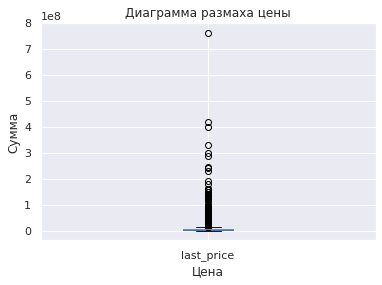

In [61]:
df['last_price'].plot.box()
plt.title("Диаграмма размаха цены")
plt.xlabel("Цена")
plt.ylabel("Сумма")
print()

По диаграмме размаха видно наличие большого количества выбросов в верхней части, которые могут повлиять на наше исследование и итоговые выводы. Максимальная цена около 800 млн. Проведем очистку данных от выбросов. И перезапишем наш датафрейм в новую переменную *df_clean*, и все дальнейшие расчеты будем проводить на ее основе.

In [62]:
Q1 = df['last_price'].quantile(0.25)
Q3 = df['last_price'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df.query('last_price <= @Q3 + 1.5 * @IQR')
"Мы отрезали {:.1%} данных".format(1 - df_clean.shape[0] / df.shape[0])

'Мы отрезали 8.7% данных'

Объем датафрейма уменьшился на 8,7%.
Проверим, как изменилась диаграмма размаха относительно прежнего вида:

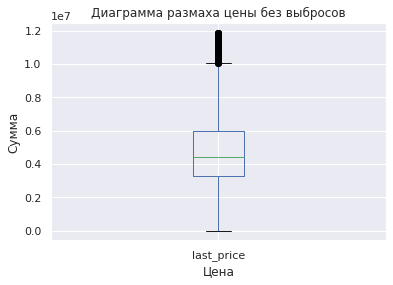

In [63]:
df_clean['last_price'].plot.box()
plt.title("Диаграмма размаха цены без выбросов")
plt.xlabel("Цена")
plt.ylabel("Сумма")
print()

Осталось некое количество выбросов в верхней части диаграммы размаха, но наш "ящик с усами" приобрел явные очертания, видно и медиану, и квартили, и основное ценовое распределение. Большинство квартир предлагаются по цене до 10 млн, с незначительными выбросами до 12 млн. 

Проверим уникальные значения по количеству комнат в столбце `rooms`, на 1-м этапе мы увидели объекты с нулевым значением комнат:

In [64]:
df_clean['rooms'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

Посмотрим, какую долю нулевые значения занимают в общем объеме данных `df_clean`:

In [65]:
print('Количество объектов с числом комнат "0" равно:' , len(df_clean.query('rooms == 0')))
print()
print('Доля объектов с числом комнат "0" составляет:', len(df_clean.query('rooms == 0')) / len(df) *100,'%')

Количество объектов с числом комнат "0" равно: 192

Доля объектов с числом комнат "0" составляет: 0.8147676639083387 %


Доля таких объектов менее 1% в общем объеме данных. Без ущерба для результатов анализа можем заменить на наиболее частое количество комнат, посмотрим распределение:

In [66]:
df_clean['rooms'].value_counts()

1    7964
2    7558
3    4918
4     752
0     192
5     118
6      16
7       1
Name: rooms, dtype: int64

Заменим 0 комнат на 1 комнату:

In [67]:
df_clean['rooms'] = df_clean['rooms'].replace(0, 1)
df_clean['rooms'].unique()

array([1, 2, 3, 4, 6, 5, 7])

Видим, замена прошла успешно у нас в наборе данные с 1-7 комнатами.

Проверим распределение данных в столбце с общей площадью:

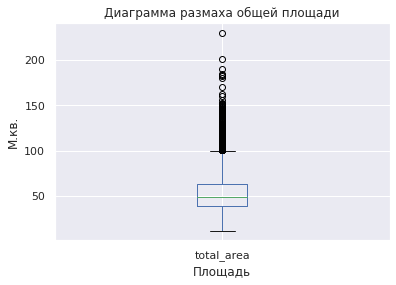

In [68]:
df_clean['total_area'].plot.box()
plt.title("Диаграмма размаха общей площади")
plt.xlabel("Площадь")
plt.ylabel("М.кв.")
print()

Видим, наша общая площадь распределена в основном объеме до 100 м.кв. И есть выбросы в верхней части диаграммы размаха до 250 м.кв. Избавимся от большинства выбросов.

In [69]:
Q1 = df['total_area'].quantile(0.25)
Q3 = df['total_area'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean.query('total_area <= @Q3 + 1.5 * @IQR')
"Мы отрезали {:.1%} данных".format(1 - df_clean.shape[0] / df.shape[0])

'Мы отрезали 9.5% данных'

Проверим новое распределение данных по общей площади:

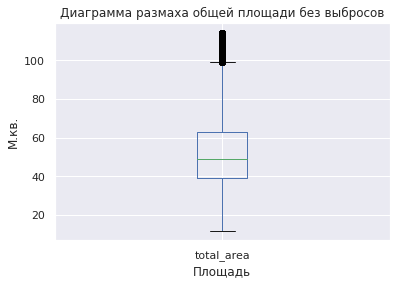

In [70]:
df_clean['total_area'].plot.box()
plt.title("Диаграмма размаха общей площади без выбросов")
plt.xlabel("Площадь")
plt.ylabel("М.кв.")
print()

Видим, количество выбросов существенно уменьшилось.

После удаления аномалий у нас остался очищенный датафрейм `df_clean`. Объем данных сократился на 9,5% от изначального, эти потери данных в данной ситуации находятся в допустимых пределах.

### Добавим в таблицу новые столбцы

Рассчитаем стоимость одного квадратного метра объекта. И запишем данные в столбец `price_meter`, для этого поделим стоимость объекта на его общую площадь.

In [71]:
df_clean['price_meter'] = round(df_clean['last_price'] / df_clean['living_area'], 2)

Из стобца `first_day_exposition` извлечем день недели, месяц и год размещения объявления и запишем данные в столбцы:   
`weekday_exposition` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);   
`month_exposition` - месяц публикации объявления;   
`year_exposition` - год публикации объявления.

In [72]:
df_clean['weekday_exposition'] = df_clean['first_day_exposition'].dt.weekday
df_clean['month_exposition'] = df_clean['first_day_exposition'].dt.month
df_clean['year_exposition'] = df_clean['first_day_exposition'].dt.year

Этажи расположения квартир разделим на типы: «первый», «последний», «другой» и запишем данные в новый столбец `floor_category`:

In [73]:
def categorize_floor(row):
    '''Функция для 
    категоризации этажей
    Args:
        row: номер этажа
    Returns:
        категория этажа
    ''' 
    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'первый'

    if floor > 1:
        if floors_total == floor:
            return 'последний'

        return 'другой'  

In [74]:
df_clean['floor_category'] = df_clean.apply(categorize_floor, axis=1)
df_clean['floor_category'].unique()

array(['первый', 'другой', 'последний'], dtype=object)

Вызвали уникальные значения нового столбца, появилось 3 заданных типа.  

Расстояние до центра города у нас указано в столбце `city_centers_nearest` в метрах. Переведем данные в километры, округлим их и запишем в новом столбце `center_dist_Km`

In [75]:
df_clean['center_dist_Km'] = round(df_clean['city_centers_nearest']/1000)

Выведем 2 верхних строки датафрейма, и убедимся, что нужные нам столбцы добавлены успешно:

In [76]:
df_clean.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_name,area_type,price_meter,weekday_exposition,month_exposition,year_exposition,floor_category,center_dist_Km
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,5000.0,0,5000.0,81.0,Шушары,поселок,180107.53,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,город,151486.88,3,8,2015,другой,14.0


Запросим информацию об итоговом датафрейме:

In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21338 entries, 1 to 23564
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21338 non-null  int64         
 1   last_price            21338 non-null  float64       
 2   total_area            21338 non-null  float64       
 3   first_day_exposition  21338 non-null  datetime64[ns]
 4   rooms                 21338 non-null  int64         
 5   ceiling_height        21338 non-null  float64       
 6   floors_total          21338 non-null  int64         
 7   living_area           21338 non-null  float64       
 8   floor                 21338 non-null  int64         
 9   is_apartment          21338 non-null  bool          
 10  studio                21338 non-null  bool          
 11  open_plan             21338 non-null  bool          
 12  kitchen_area          21338 non-null  float64       
 13  balcony         

Теперь датафрейм состоит из 30 столбцов и 21338 строк.

**Выводы**


На этапе предобработки мы обнаружили несколько проблем в данных:

 - нарушения в стиле заголовков,
 - некорректные отображения данных,
 - пропущенные значения,
 - неявные дубликаты,
 - аномальные значения и выбросы.
 
Мы исправили заголовки, перевели в корректный формате отображение даты. Заменили пропуски, где это было возможно, заменили аномальные значения более подходящими, избавили датафрейм от выбросов в столбцах `last_price`, `total_area`, объем данных сократился на 9,5%. Перезаписали обновленный датафрейм в новую переменную `df_clean`. Исправили дубликаты в наименованиях населенных пунктов. Добавили в таблицу новые столбцы, которые на следующем этапе помогут нам исследовать наши данные и сделать выводы.

## Исследование данных

На этом этапе изучим важные параметры объектов недвижимости и найдем закономерности ценообразования.

### Изучим характеристики объектов

#### Оценим общую площадь предлагаемых объектов недвижимости.

Описание данных по общей площади: 
 count    21338.000000
mean        52.594961
std         17.691978
min         12.000000
25%         39.000000
50%         49.000000
75%         63.000000
max        114.200000
Name: total_area, dtype: float64

ТОП-10 предложений по общей площади: 
 45.0    417
42.0    383
31.0    345
44.0    343
60.0    339
40.0    315
43.0    300
32.0    289
46.0    281
36.0    279
Name: total_area, dtype: int64


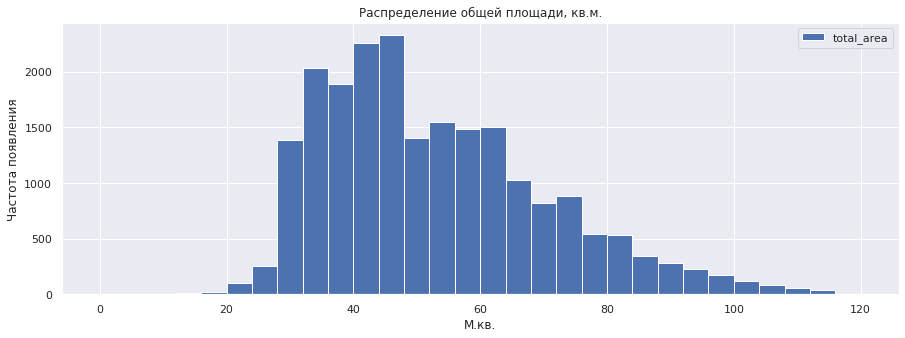

In [78]:
df_clean.plot(y='total_area', kind='hist', range=(0, 120), bins=30, figsize=(15, 5))
plt.title("Распределение общей площади, кв.м.")
plt.xlabel("М.кв.")
plt.ylabel("Частота появления")
print('Описание данных по общей площади: \n', df_clean['total_area'].describe())
print()
print('ТОП-10 предложений по общей площади: \n', df_clean['total_area'].value_counts().head(10))

Наиболее часто продают квартиры общей площадью до 60м2. Объекты такой площади входят в топ-10 предложений. Свыше этой площади количество предложений существенно уменьшается.

#### Изучим жилую площадь

Описание данных по жилой площади: 
 count    21338.000000
mean        30.115528
std         12.551659
min          2.000000
25%         18.300000
50%         29.000000
75%         38.879167
max         93.600000
Name: living_area, dtype: float64

ТОП-10 предложений по жилой площади: 
 18.0    882
17.0    688
30.0    591
16.0    483
20.0    474
28.0    420
31.0    374
19.0    327
29.0    315
32.0    313
Name: living_area, dtype: int64


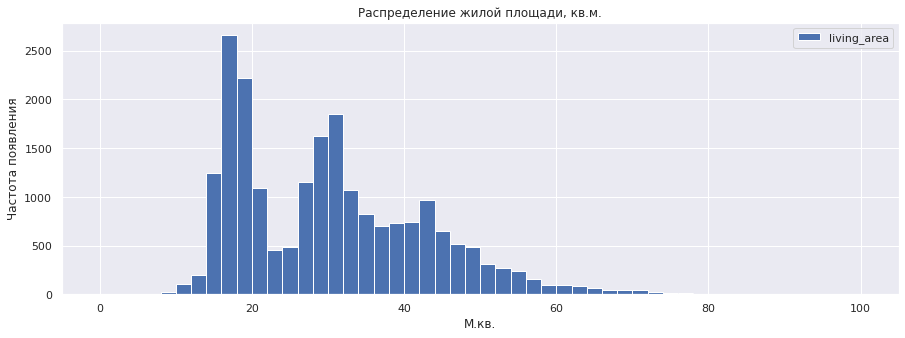

In [79]:
df_clean.plot(y='living_area', kind='hist', range=(0, 100), bins=50, figsize=(15, 5))
plt.title("Распределение жилой площади, кв.м.")
plt.xlabel("М.кв.")
plt.ylabel("Частота появления")
print('Описание данных по жилой площади: \n', df_clean['living_area'].describe())
print()
print('ТОП-10 предложений по жилой площади: \n', df_clean['living_area'].value_counts().head(10))

У большинства предлагаемых квартир жилая площадь не превышает 32 м2. Объекты такой площади входят в топ-10 предложений. 2 явных пика (в области 20 м.кв и в области 30 м.кв) на нашей диаграмме могут означать жилую площадь в 1-комнатной, 2-х комнатной. Минимальная предлагаемая жилая площадь - 2м2, вероятно продают долю в квартире, а возможна и опечатка при вводе данных.

#### Посмотрим на площадь кухни

Описание данных по площади кухни: 
 count    21338.000000
mean         9.425171
std          3.723642
min          1.300000
25%          7.000000
50%          8.900000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

ТОП-10 предложений по площади кухни: 
 6.0     1297
10.0    1200
8.0     1091
9.0     1074
7.0     1057
11.0     758
12.0     582
5.5      424
8.5      413
5.0      355
Name: kitchen_area, dtype: int64


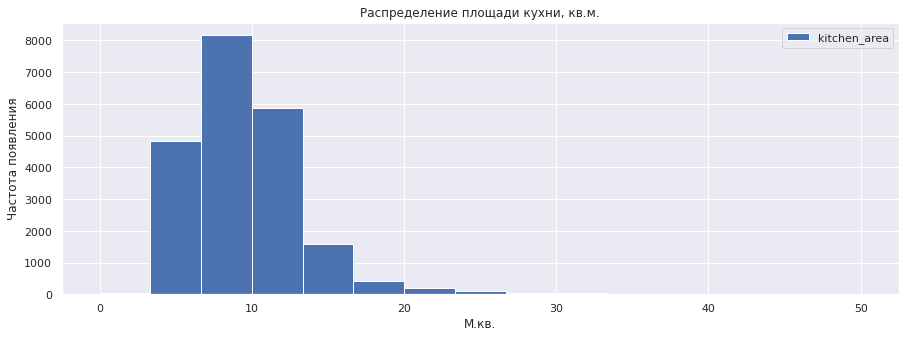

In [80]:
df_clean.plot(y='kitchen_area', kind='hist', range=(0, 50), bins=15, figsize=(15, 5))
plt.title("Распределение площади кухни, кв.м.")
plt.xlabel("М.кв.")
plt.ylabel("Частота появления")
print('Описание данных по площади кухни: \n', df_clean['kitchen_area'].describe())
print()
print('ТОП-10 предложений по площади кухни: \n', df_clean['kitchen_area'].value_counts().head(10))

У большинства предлагаемых квартир площадь кухни не превышает 12 м2. -> топ-10 предложений. Свыше этой площади количество предложений уменьшается. Минимальная предлагаемая жилая площадь - 1.3м2, вероятно продают долю в квартире, а возможна и опечатка при вводе данных

#### Изучим цену объектов. 

Для лучшей наглядности переведем единицы измерения столбца `last_price` в млн.  


Описание данных по цене квартиры, в млн.: 
 count    21338.000000
mean         4.799778
std          2.178442
min          0.012190
25%          3.300000
50%          4.400000
75%          5.950000
max         11.866860
Name: last_price, dtype: float64

ТОП-10 предложений цены, в млн.: 
 4.5    340
3.5    289
4.3    260
4.0    260
4.2    258
3.6    256
3.3    243
3.8    240
3.2    236
3.7    233
Name: last_price, dtype: int64


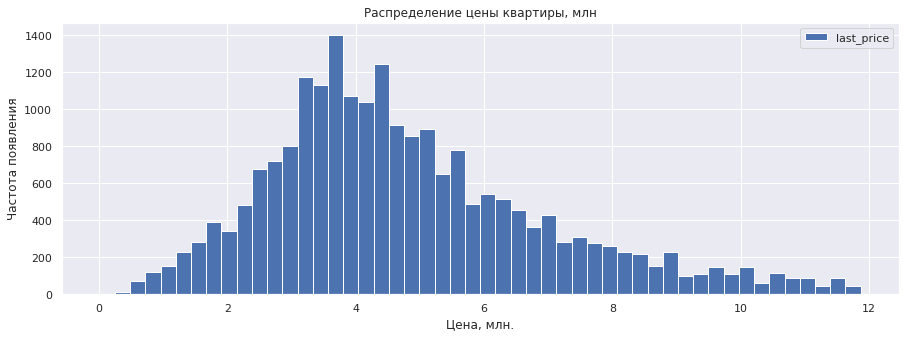

In [81]:
df_clean['last_price'] = df_clean['last_price']/1000000
df_clean.plot(y='last_price', kind='hist', bins=50, figsize=(15, 5))
plt.title("Распределение цены квартиры, млн")
plt.xlabel("Цена, млн.")
plt.ylabel("Частота появления")
print()
print('Описание данных по цене квартиры, в млн.: \n', df_clean['last_price'].describe())
print()
print('ТОП-10 предложений цены, в млн.: \n', df_clean['last_price'].value_counts().head(10))

Видим, чаще других вариантов предлагаются квартиры в пределах ценового диапазона 3-4,5млн. Минимальная стоимость 12 190 тыс. Вероятнее всего это стоимость доли квартиры. Максимальная цена около 12 млн.

#### Изучим количество комнат в наших объектах.

Описание данных по количеству комнат: 
 count    21338.000000
mean         1.920752
std          0.873844
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

ТОП-5 предложений по количеству комнат: 
 1    8154
2    7551
3    4874
4     692
5      63
Name: rooms, dtype: int64


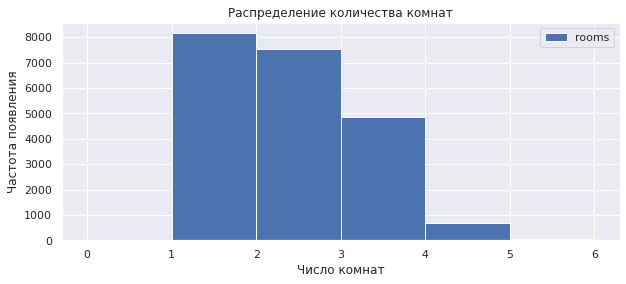

In [82]:
df_clean.plot(y='rooms', kind='hist', range=(0, 6), bins=6, figsize=(10, 4))
plt.title('Распределение количества комнат')
plt.xlabel("Число комнат")
plt.ylabel("Частота появления")
print('Описание данных по количеству комнат: \n', df_clean['rooms'].describe())
print()
print('ТОП-5 предложений по количеству комнат: \n', df_clean['rooms'].value_counts().head())

Больше всего предложений с 1 комнатой, чуть меньше с 2 комнатами. В целом с ростом количества комнат количество предложений уменьшается.

#### Изучим высоту потолков в наших квартирах:


Описание данных по высоте потолков: 
 count    21338.000000
mean         2.671262
std          0.179323
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64


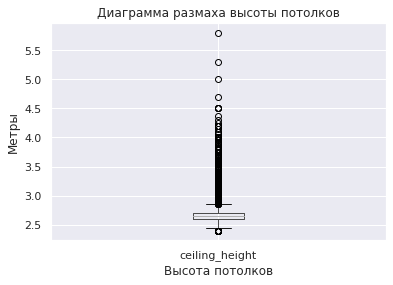

In [83]:
df_clean.boxplot('ceiling_height')
plt.title("Диаграмма размаха высоты потолков")
plt.xlabel("Высота потолков")
plt.ylabel("Метры")
print()
print('Описание данных по высоте потолков: \n', df_clean['ceiling_height'].describe())

ТОП-10 предложений по высоте потолков: 
 2.65    9079
2.50    3486
2.60    1628
2.70    1488
2.55     973
2.80     833
2.75     822
3.00     773
3.20     188
2.56     138
Name: ceiling_height, dtype: int64


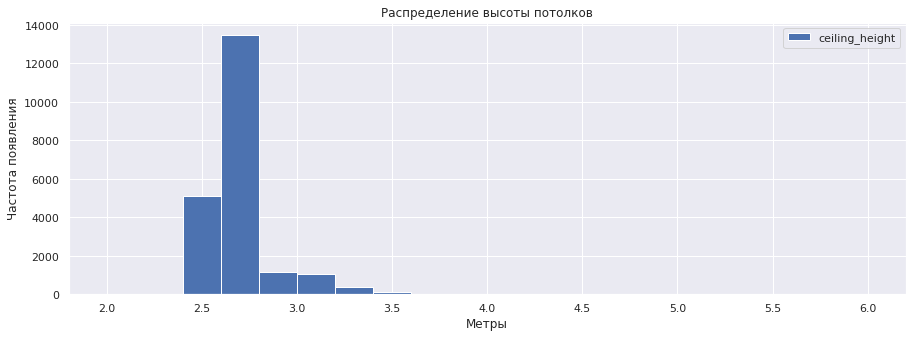

In [84]:
df_clean.plot(y='ceiling_height', kind='hist', range=(2, 6), bins=20, figsize=(15, 5), title='Высота потолков')
plt.title('Распределение высоты потолков')
plt.xlabel("Метры")
plt.ylabel("Частота появления")
print('ТОП-10 предложений по высоте потолков: \n', df_clean['ceiling_height'].value_counts().head(10))

Чаще всего предлагают квартиры стандартной высоты, до 2,7м. Квартир с более высокими потолками предлагают существенно меньше, есть отдельные предложения с высотой более 4-х метров. Скорее всего, это двухуровневые квартиры.

#### Рассмотрим на каких этажах расположены наши объекты недвижимости.

Описание данных по этажу объекта недвижимости: 
 count    21338.000000
mean         5.887103
std          4.903574
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

ТОП-5 предложений этажей: 
 2    3004
1    2773
3    2719
4    2450
5    2351
Name: floor, dtype: int64


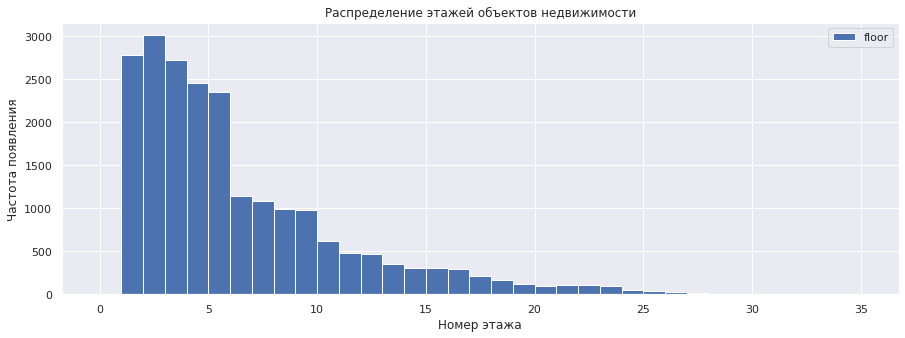

In [85]:
df_clean.plot(y='floor', kind='hist', range=(0, 35), bins=35, figsize=(15, 5))
plt.title('Распределение этажей объектов недвижимости')
plt.xlabel("Номер этажа")
plt.ylabel("Частота появления")
print('Описание данных по этажу объекта недвижимости: \n', df_clean['floor'].describe())
print()
print('ТОП-5 предложений этажей: \n', df_clean['floor'].value_counts().head())

Большинство предлагаемых квартир располагаются на 1-5 этажах, лидирует 2-й этаж. Далее следует группа предложений на 6-9 этажах. На более высоких этажах предложений становится меньше.

#### Посмотрим на распределение этажей по типам:

Количество квартир по типам этижей: floor_category
первый        2773
последний     2947
другой       15618
Name: floor, dtype: int64


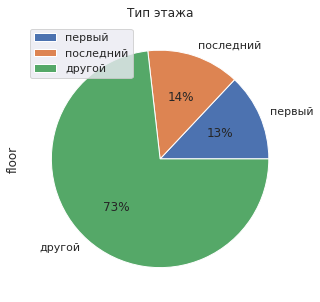

In [86]:
df_clean.groupby('floor_category')['floor'].agg('count').sort_values()\
.plot(kind='pie', autopct='%1.0f%%', title='Тип этажа', legend=True, figsize=(5,5))
print('Количество квартир по типам этижей:', df_clean.groupby('floor_category')['floor'].agg('count').sort_values())

Большинство квартир - 73% располагаются между первым и последним этажами, 14% на последнем этаже и 13% на - первом этаже. 

#### Рассмотрим общую этажность зданий, где расположены предлагаемые квартиры:

Описание данных по общему количеству этажей: 
 count    21338.000000
mean        10.786484
std          6.627974
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

ТОП-5 этажности зданий: 
 5     5377
9     3658
12    1266
16    1237
10    1057
Name: floors_total, dtype: int64


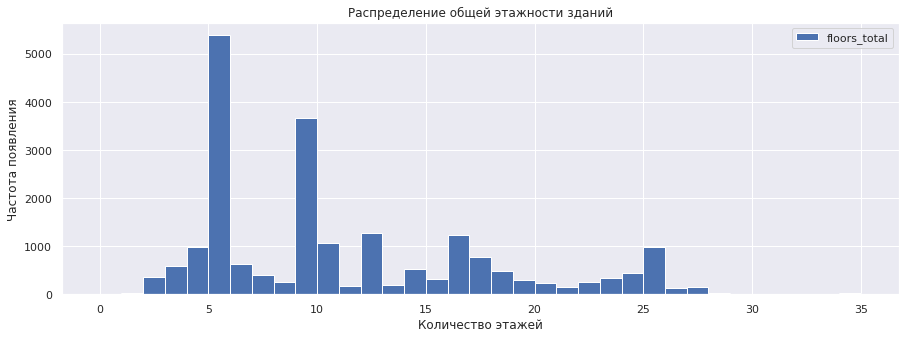

In [87]:
df_clean.plot(y='floors_total', kind='hist', range=(0, 35), bins=35, figsize=(15, 5))
plt.title('Распределение общей этажности зданий')
plt.xlabel("Количество этажей")
plt.ylabel("Частота появления")

print('Описание данных по общему количеству этажей: \n', df_clean['floors_total'].describe())
print()
print('ТОП-5 этажности зданий: \n', df_clean['floors_total'].value_counts().head())

Лидирует 5-ти этажная застройка, на втором месте 9-ти этажная застройка, на третьем - 16 этажей. Есть единичные объекты высотой 27-37 этажей.

#### Обратимся к параметрам расстояния. 

И изучим:
- расстояние до центра города `city_centers_nearest`,
- расстояние до ближайшего аэропорта `airports_nearest`,
- расстояние до ближайшего парка `parks_nearest`.

Сначала оценим **расстояние до центра города, в м**.


Описание данных по расстоянию до центра города: 
 count    15893.000000
mean     15013.661801
std       8512.889783
min        208.000000
25%      10659.000000
50%      13649.000000
75%      16704.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


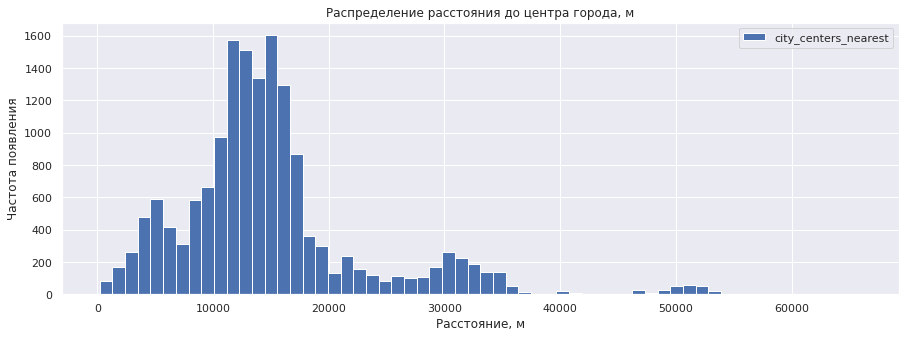

In [88]:
df_clean.plot(y='city_centers_nearest', kind='hist', bins=60, figsize=(15, 5))
plt.title('Распределение расстояния до центра города, м')
plt.xlabel("Расстояние, м")
plt.ylabel("Частота появления")
print()
print('Описание данных по расстоянию до центра города: \n', df_clean['city_centers_nearest'].describe())

Мы получили несколько пиковых значения:
- большинство объектов расположено в радиусе 10-16 тыс.м или 10-16 км от центра города.
- есть пик на уровне 4000-6000м (4-6 км)
- есть небольшой пик на расстоянии ~30 тыс.м /30 км

Проверим, на каком **расстоянии от ближайшего аэропорта, в м.** расположены объекты недвижимости: 

Описание данных по расстоянию до аэропорта: 
 count    15882.000000
mean     28920.148218
std      13001.612383
min          0.000000
25%      18025.500000
50%      27122.000000
75%      37636.750000
max      84869.000000
Name: airports_nearest, dtype: float64


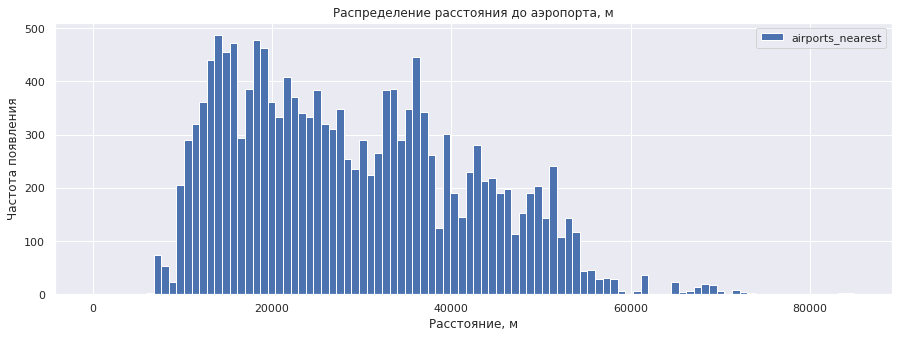

In [89]:
df_clean.plot(y='airports_nearest', kind='hist', bins=100, figsize=(15, 5))
plt.title('Распределение расстояния до аэропорта, м')
plt.xlabel("Расстояние, м")
plt.ylabel("Частота появления")


print('Описание данных по расстоянию до аэропорта: \n', df_clean['airports_nearest'].describe())

Мы видим несколько пиковых значений расстояния до аэропорта. Большая часть от всех объектов находится от аэропорта в пределах 30 тыс.м. Есть много объектов в пределах 33-35 тыс.м. Большинство объектов расположено в пределах 60 тыс.м. от аэропорта, с отдельными выбросами - максимальное расстояние до аэропорта 85 тыс.м. 

Проверим расстояние до **ближайшего парка, в м**.    

Вспомним, мы заполнили пропуски данных в пустотах значением 5000, это значит, что парк отсутствует в радиусе 3 км. Поэтому  в процессе анализа, мы оценим только долю квартир, которые расположены в радиусе 3 км относительно общего числа данных:

In [90]:
print('Количество объектов с парком в радиусе 3 км:' \
      , len(df_clean.query('parks_nearest < 5000')))
print()
print('Доля объектов с парком в радиусе 3 км:',\
      len(df_clean.query('parks_nearest < 5000')) / len(df) *100,'%')

Количество объектов с парком в радиусе 3 км: 6592

Доля объектов с парком в радиусе 3 км: 27.973689794186292 %


Описание данных по расстоянию до парка: 
 count    6592.000000
mean      488.490595
std       326.592554
min         1.000000
25%       289.000000
50%       456.000000
75%       613.250000
max      3190.000000
Name: parks_nearest, dtype: float64


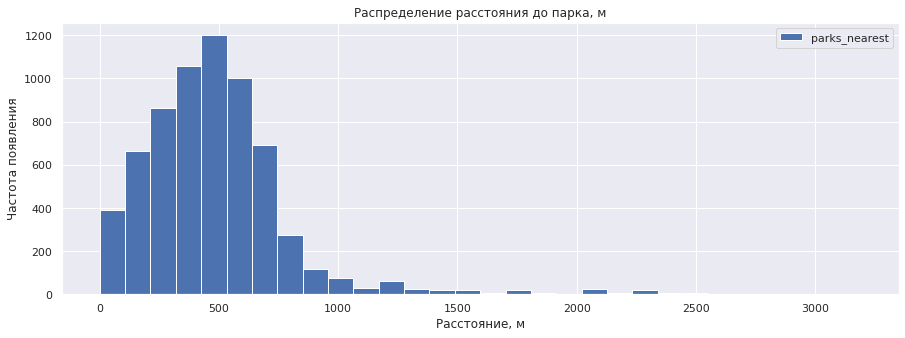

In [91]:
df_clean.query('parks_nearest < 5000').plot(y='parks_nearest', kind='hist', \
                                      bins=30, figsize=(15, 5), title='Расстояние до парка')
plt.title('Распределение расстояния до парка, м')
plt.xlabel("Расстояние, м")
plt.ylabel("Частота появления")

print('Описание данных по расстоянию до парка: \n', df_clean.query('parks_nearest < 5000')['parks_nearest'].describe())

28% от всех объектов располагается рядом с парками. Большинство квартир находятся в пределах 700 м. И больше всего квартир находятся на расстоянии от парков примерно в 500 метрах. А некоторые жилища даже в шаговой доступности. 

Есть где погулять жильцам!

#### Посмотрим на периоды публикации объявлений:  день и месяц публикации.

ТОП-3 месяцы публикации: 
 2    2389
3    2338
4    2139
Name: month_exposition, dtype: int64



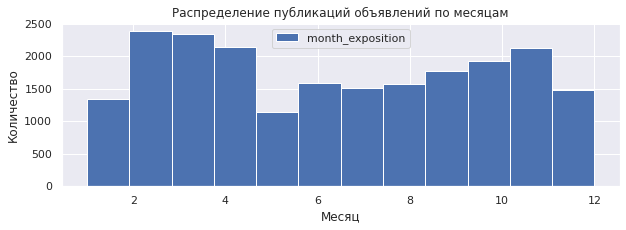

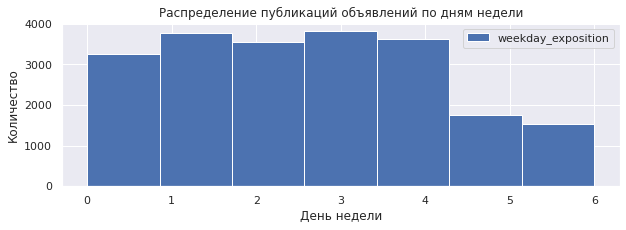

In [92]:
df_clean.plot(y='month_exposition', kind='hist', bins=12, figsize=(10, 3))
plt.title('Распределение публикаций объявлений по месяцам')
plt.xlabel("Месяц")
plt.ylabel("Количество")

print('ТОП-3 месяцы публикации: \n', df_clean['month_exposition'].value_counts().head(3))
df_clean.plot(y='weekday_exposition', kind='hist', bins=7, figsize=(10, 3))
plt.title('Распределение публикаций объявлений по дням недели')
plt.xlabel("День недели")
plt.ylabel("Количество")

print()

Объявления публикуют чаще в будние дни, чем в выходные: лидеры - четверг и вторник. Число публикаций в выходные снижается более, чем в 2 раза, относительно будних дней.   
"Любимые" месяцы - февраль, март, апрель и ноябрь. В летние месяцы публикуют меньше объявлений, аналогичный уровень публикаций в январе и декабре. В течение осенних месяцев снова начинается рост публикаций. Из этих данных можно сделать вывод, в какие периоды повышается количество предложений, а значит больше вариантов для выбора.

### Оценим сроки продажи жилья.

Сроки продажи: 
 count    18732.000000
mean       171.927077
std        210.131375
min          1.000000
25%         43.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64


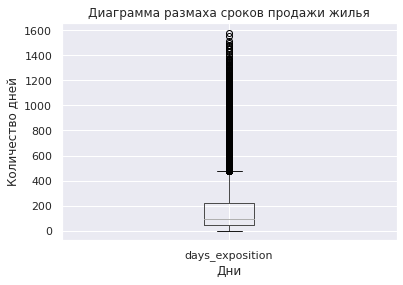

In [93]:
df_clean.boxplot('days_exposition')
plt.title("Диаграмма размаха сроков продажи жилья")
plt.xlabel("Дни")
plt.ylabel("Количество дней")

print('Сроки продажи: \n', df_clean['days_exposition'].describe())

Напомним, что у нас часть данных по этому параметру остались пустыми, поэтому в count указано число 18732. Минимальный срок размещения объявления - 1 день, а максимальный срок 1580 дней. Это 4 года. Либо объект так долго не могут продать, либо не удалено объявление все это время. Медиана по параметру составляет 91, а среднее 171,92. Это означает большое наличие выбросов, что мы видим по "ящику с усами". 
Построим 2 гистограммы, для очищенных данных и для неочищенных.

In [94]:
Q1 = df_clean['days_exposition'].quantile(0.25)
Q3 = df_clean['days_exposition'].quantile(0.75)
IQR = Q3 - Q1
df_days_clean = df_clean.query('days_exposition <= @Q3 + 1.5 * @IQR')
"Мы отрезали {:.1%} данных".format(1 - df_days_clean.shape[0] / df_clean.shape[0])

'Мы отрезали 19.6% данных'

ТОП-5 сроков продажи: 
 45.0    875
60.0    532
7.0     223
30.0    197
4.0     162
Name: days_exposition, dtype: int64


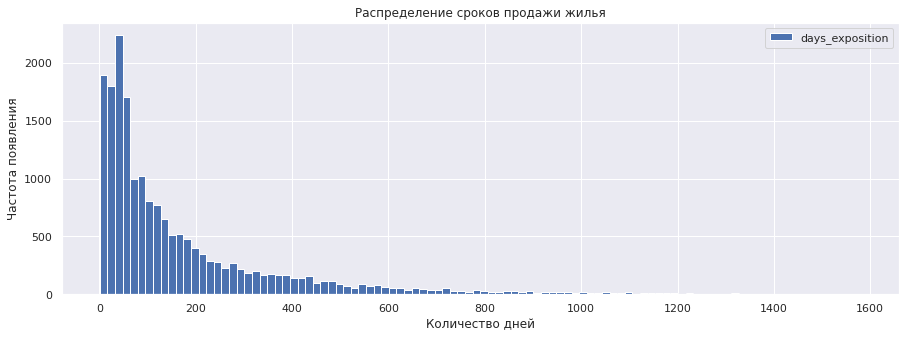

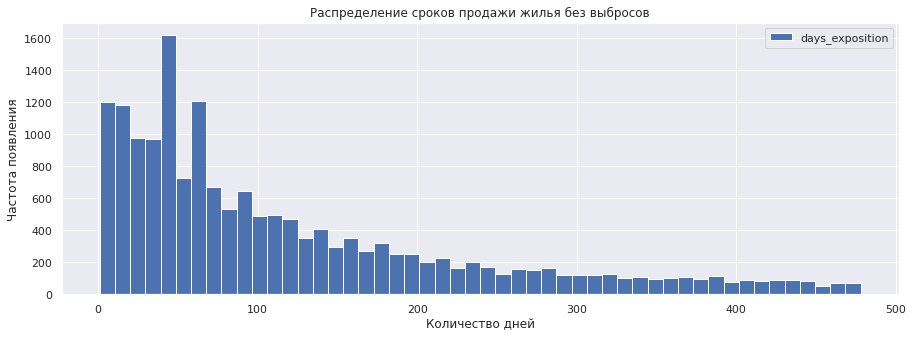

In [95]:
df_clean.plot(y='days_exposition', kind='hist', bins=100, figsize=(15, 5))
plt.title('Распределение сроков продажи жилья')
plt.xlabel("Количество дней")
plt.ylabel("Частота появления")

df_days_clean.plot(y='days_exposition', kind='hist', bins=50, figsize=(15, 5))
plt.title('Распределение сроков продажи жилья без выбросов')
plt.xlabel("Количество дней")
plt.ylabel("Частота появления")

print('ТОП-5 сроков продажи: \n', df_clean['days_exposition'].value_counts().head())

Посмотрим, как влияет количество комнат в квартире на сроки продаж.

In [96]:
print('Сроки продажи квартир в зависимости от количества комнат, median')
df_clean.pivot_table(index='rooms', values='days_exposition', aggfunc = 'median').head()

Сроки продажи квартир в зависимости от количества комнат, median


,days_exposition
rooms,
1,79.0
2,90.0
3,109.0
4,134.0
5,172.0


Наши данные по срокам продажи квартир на 19,6% состоят из выбросов, сюда вошли длительные сроки размещения объявлений от 1,5 лет до 4-х. По гистограмме с очищенными данными видно, что большинство квартир продается в течение 100 дней. Быстрее продаются однокомнатные квартиры, наиболее типичные сроки публикации объявлений для этой группы 79 дней, 2-х комнатные квартиры продаются чаще за 90 дней, 3-х комнатные - за 109 дней.
На основании модели "ящик с усами" по срокам за быструю продажу примем сроки до Q2 - до 91 дня, а чрезмерно долгими сроки дольше Q3 - свыше 217 дней.

### Изучим зависимость цены от основных параметров квартиры и периодов публикации объявлений

Создадим новую переменную `df_slice`, сюда запишем отсортированный датафрейм по столбцам:
- цена, млн.;
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- этаж, на котором расположена квартира (первый, последний, другой);
- дата размещения (день недели, месяц, год).

In [97]:
df_slice = df_clean[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_category', \
              'weekday_exposition', 'month_exposition', 'year_exposition']]
df_slice.head()             

,last_price,total_area,living_area,kitchen_area,rooms,floor_category,weekday_exposition,month_exposition,year_exposition
1,3.350,40.4,18.6,11.0,1,первый,1,12,2018
2,5.196,56.0,34.3,8.3,2,другой,3,8,2015
4,10.000,100.0,32.0,41.0,2,другой,1,6,2018
5,2.890,30.4,14.4,9.1,1,другой,0,9,2018
6,3.700,37.3,10.6,14.4,1,другой,3,11,2017


Построим матрицу корреляции ценообразования по параметрам квартиры

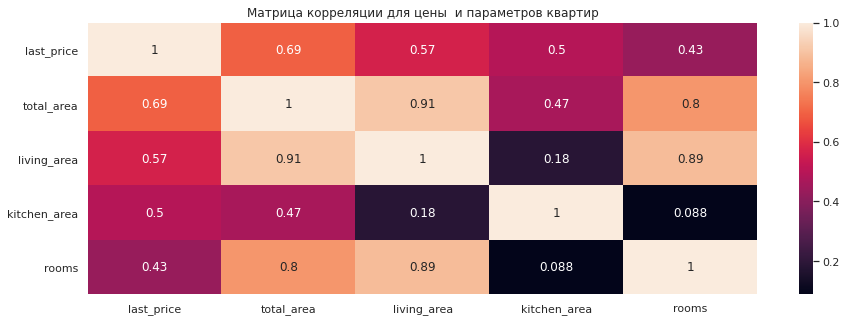

In [98]:
plt.figure(figsize=(15,5))
sns.heatmap(df_slice[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr(), annot=True)
plt.title('Матрица корреляции для цены  и параметров квартир')
plt.show()

На формирование цены больше всего влияют:
 - общая площадь жилья, с коэффициентом корреляции 0,69
 - жилая площадь 0,57
 - площадь кухни 0,50
 
В меньшей степени цена зависит от количества комнат, коэффициент 0,43.

Тесно взаимосвязаны между собой параметры общей площади и количество комнат - коэф. 0,8, а также жилой площади и количества комнат - коэф. 0,89 

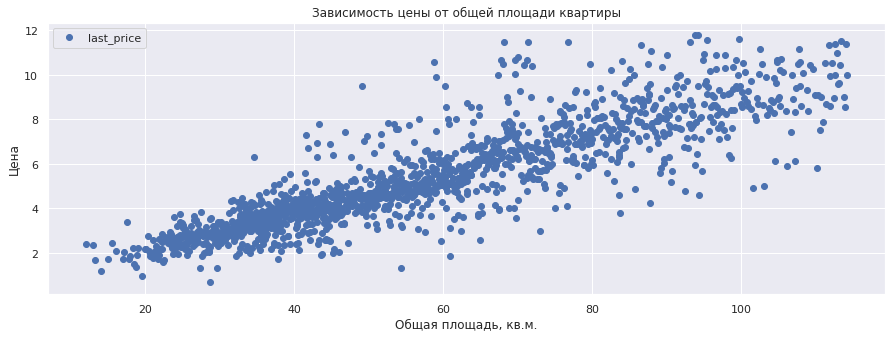

In [99]:
df_clean.groupby('total_area')['last_price'].agg('mean').reset_index().plot(x='total_area', y='last_price',\
                            style='o', figsize=(15, 5))

plt.title('Зависимость цены от общей площади квартиры')
plt.xlabel("Общая площадь, кв.м.")
plt.ylabel("Цена")

plt.show()

Этот график соответствует тому, что нам показала матрица корреляции.

Цена и общая площадь взаимосвязаны, особенно заметна эта взаимосвязь до площади  ~50 м.кв. При большей площади зависимость снижается, очевидно наличие влияния других критериев.

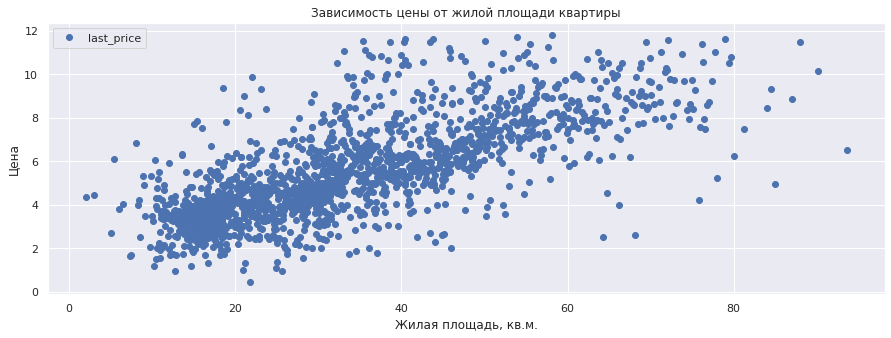

In [100]:
df_clean.groupby('living_area')['last_price'].agg('mean').reset_index().plot(x='living_area', y='last_price',\
                            style='o', figsize=(15, 5))
plt.title('Зависимость цены от жилой площади квартиры')
plt.xlabel("Жилая площадь, кв.м.")
plt.ylabel("Цена")

plt.show()

Жилая площадь с ценой имеет взаимосвязь - видим концентрацию точек до уровня площади 30 м2. При более высоких площадях разброс в цене становится более явным.

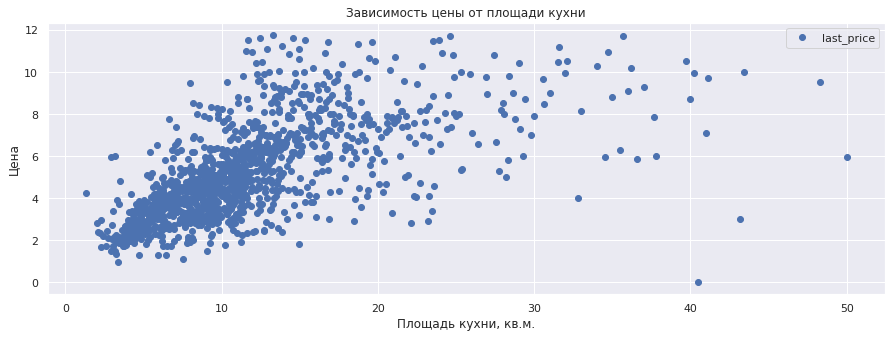

In [101]:
df_clean.groupby('kitchen_area')['last_price'].agg('mean').reset_index().plot(x='kitchen_area', y='last_price',\
                            style='o', figsize=(15, 5))
plt.title('Зависимость цены от площади кухни')
plt.xlabel("Площадь кухни, кв.м.")
plt.ylabel("Цена")

plt.show()

Площадь кухни на уровень цены оказывает влияние. Точки на графике сконцентрированы до уровня площади ~10 м.кв. После этой границы начинается более интенсивный разброс точек, и, соответственно, снижается взаимосвязь цены квартиры и площади кухни.

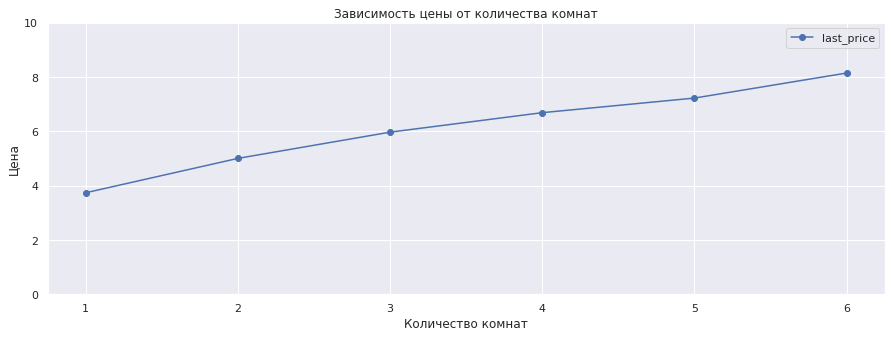

In [102]:
df_clean.groupby('rooms')['last_price'].agg('mean').reset_index().plot(x='rooms', y='last_price',\
                            style='o-', figsize=(15, 5), ylim=(0, 10))

plt.title('Зависимость цены от количества комнат')
plt.xlabel("Количество комнат")
plt.ylabel("Цена")
plt.show()

По графику прослеживается зависимость между количеством комнат и ценой квартиры, больше комнат - выше цена. Параметр количество комнат тесно связан и с площадью квартиры, и с жилой площадью.

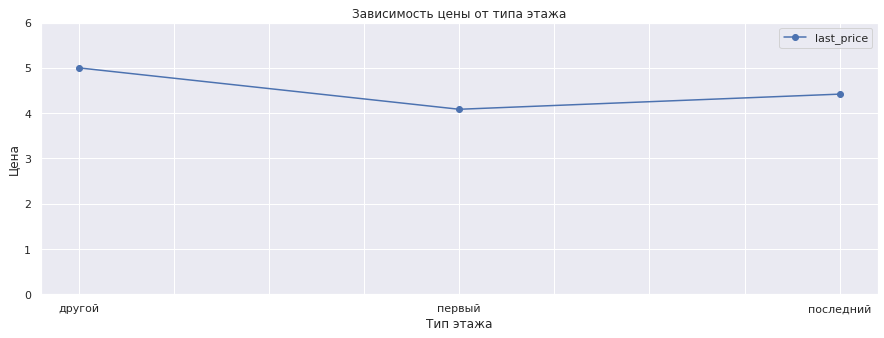

In [103]:
(df_clean.groupby('floor_category')['last_price']
         .agg('mean').reset_index()
         .plot(x='floor_category', 
               y='last_price',
               style='o-', 
               figsize=(15, 5), ylim=(0, 6)))

plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

Выше цена квартир, расположенных между 1-м и последним этажами. Ниже всего цена квартир расположенных на 1-м этаже.

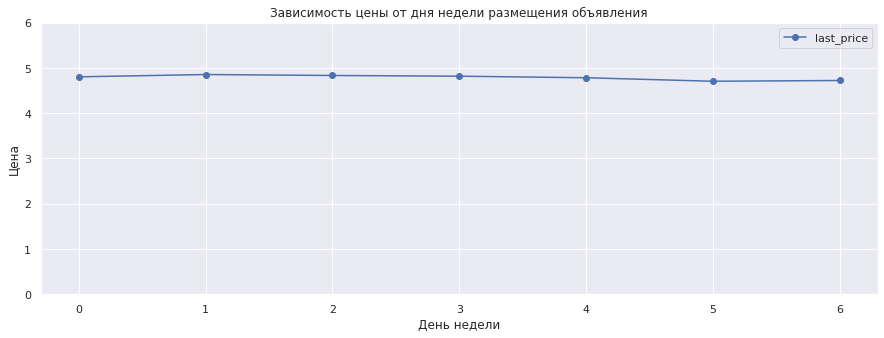

In [104]:
(df_clean.groupby('weekday_exposition')['last_price']
         .agg('mean').reset_index()
         .plot(x='weekday_exposition', 
               y='last_price',
               style='o-', figsize=(15, 5), 
               ylim=(0, 6)))
plt.title('Зависимость цены от дня недели размещения объявления')
plt.xlabel("День недели")
plt.ylabel("Цена")
plt.show()

Взаимосвязь между днем недели публикации объявления и ценой на квартиру не наблюдается.

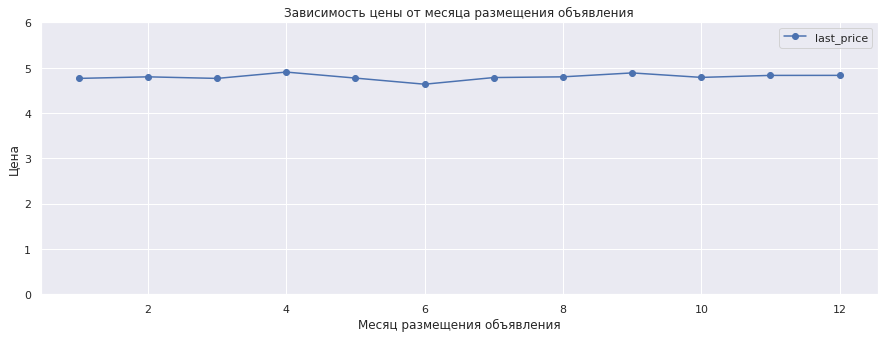

In [105]:
(df_clean.groupby('month_exposition')['last_price']
         .agg('mean').reset_index()
         .plot(x='month_exposition', 
               y='last_price',
               style='o-', figsize=(15, 5), 
               ylim=(0, 6)))
plt.title('Зависимость цены от месяца размещения объявления')
plt.xlabel("Месяц размещения объявления")
plt.ylabel("Цена")
plt.show()

Взаимосвязь между месяцем публикации объявления и ценой на квартиру не очевидна. Присутствуют небольшие пиковые значения в апреле и сентябре, но они незначительно отличаются от остальных месяцев.

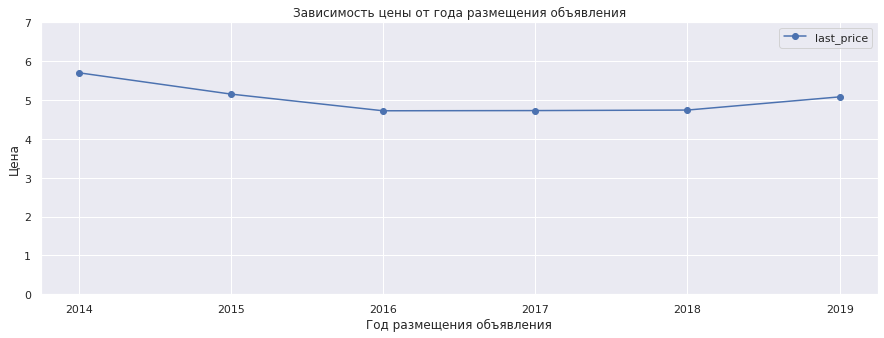

In [106]:
(df_clean.groupby('year_exposition')['last_price']
         .agg('mean').reset_index()\
         .plot(x='year_exposition', 
               y='last_price', 
               style='o-', figsize=(15, 5), 
               ylim=(0,7)))
plt.title('Зависимость цены от года размещения объявления')
plt.xlabel("Год размещения объявления")
plt.ylabel("Цена")
plt.show()

Более дорогие квартиры продавались в 2014 году, с 2014 к 2016 году прослеживается тренд на снижение цены. В 2017 и 2018 годах цены были на одном уровне с 2016 годом, рост виден только в 2019 году. Взаимосвязь между годом и ценой прослеживается.

### Исследуем цену за 1 м.кв. в ТОП-10 населенных пунктах по числу объявлений

Запишем данные о средней цене за 1м.кв в новую переменную `name_price`. Сгруппируем данные по количеству объявлений и средней стоимости за 1 м.кв. Отсортируем полученную таблицу по убыванию количества объявлений и выберем ТОП-10

In [107]:
name_price = (df_clean.groupby(['area_name','area_type'])['price_meter'].agg(['count','mean'])\
              .sort_values(by='count', ascending = False)\
              .reset_index()).loc[:9]

Средняя цена за 1м.кв. по ТОП-10 населенных пунктов - лидеров по количеству объявлений: 
          area_name area_type  count           mean
0  Санкт-Петербург     город  13546  196714.325562
1           Мурино   поселок    586  174054.343447
2          Кудрово   деревня    468  192450.757970
3           Шушары   поселок    436  154695.709197
4       Всеволожск     город    394  128949.660228
5           Пушкин     город    336  184197.317887
6          Колпино     город    335  131786.587910
7        Парголово   поселок    326  197370.611258
8          Гатчина     город    303  121788.534356
9           Выборг     город    228   99197.646316

Населенный пункт с максимальной средней ценой за 1 м.кв.: 
    area_name area_type  count           mean
7  Парголово   поселок    326  197370.611258

Населенный пункт с минимальной средней ценой за 1 м.кв.: 
   area_name area_type  count          mean
9    Выборг     город    228  99197.646316


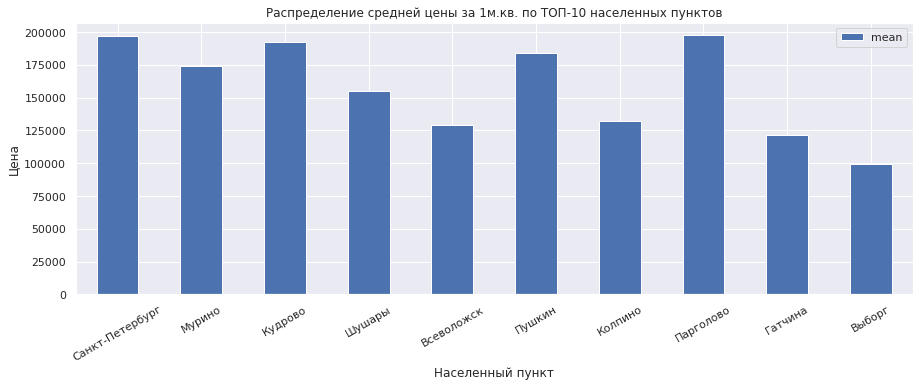

In [108]:
name_price.plot(x='area_name', y='mean', kind='bar', figsize=(15, 5), rot=30)

plt.title('Распределение средней цены за 1м.кв. по ТОП-10 населенных пунктов')
plt.xlabel("Населенный пункт")
plt.ylabel("Цена")

print('Средняя цена за 1м.кв. по ТОП-10 населенных пунктов - лидеров по количеству объявлений: \n', name_price)
print()
print('Населенный пункт с максимальной средней ценой за 1 м.кв.: \n', \
      name_price[name_price['mean'] == name_price['mean'].max()])
print()
print('Населенный пункт с минимальной средней ценой за 1 м.кв.: \n', \
      name_price[name_price['mean'] == name_price['mean'].min()])

- Больше всего объявлений опубликовано в городе Санкт-Петербурге, на 2-м месте поселок Мурино, на 3-м деревня Кудрово.
- Самая дорогая цена за 1 кв. метр в поселке Парголово, в Санкт-Петербурге примерно на 650 руб цены 1 кв.м. ниже, чем у лидера. Самая низкая цена из ТОП-10 в городе Выборге.

### Изучим зависимость цены квартир от расстояния до центра Санкт-Петербурга

Изучим, как соотносятся стоимость квартиры и удаленность квартиры от центра города. Создадим новую переменную `price_centers_nearest`, куда запишем данные для Санкт-Петербурга: стоимость квартир и расстояние от центра города, посчитаем стоимость 1-го км. и запишем ее столбец `price_Km`.

Посмотрим на уникальные значения

In [109]:
df_clean['center_dist_Km'].unique()

array([19., 14.,  8., nan, 12., 15., 52., 33., 31., 11., 10.,  2., 13.,
       32., 16., 17., 30.,  4., 51., 50., 24., 18.,  9., 28.,  7.,  3.,
       27.,  6., 21., 49., 35.,  5., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25., 66., 47., 40., 57.,  0., 37., 41., 48., 62.,
       60., 39., 42., 65., 54., 43., 59., 45., 61., 63.])

В данных столбца присутствует "0". На ноль делить нельзя. Нужно будет эти данные скорректировать

In [110]:
price_centers_nearest = df_clean.loc[df_clean['area_name'] == 'Санкт-Петербург']\
                        [['last_price', 'area_name', 'area_type', 'center_dist_Km']].reset_index(drop=True)
price_centers_nearest['price_Km'] = price_centers_nearest['last_price'] / price_centers_nearest['center_dist_Km']
price_centers_nearest.head()

,last_price,area_name,area_type,center_dist_Km,price_Km
0,5.196,Санкт-Петербург,город,14.0,0.371143
1,10.000,Санкт-Петербург,город,8.0,1.250000
2,7.915,Санкт-Петербург,город,12.0,0.659583
3,5.400,Санкт-Петербург,город,15.0,0.360000
4,5.050,Санкт-Петербург,город,14.0,0.360714


Посмотрим на результат вычислений *price_Km* при  *center_dist_Km* = 0

In [111]:
price_centers_nearest.query('center_dist_Km == 0').head()

,last_price,area_name,area_type,center_dist_Km,price_Km
654,5.80,Санкт-Петербург,город,0.0,inf
1076,9.59,Санкт-Петербург,город,0.0,inf
1438,7.20,Санкт-Петербург,город,0.0,inf
1659,5.30,Санкт-Петербург,город,0.0,inf
2141,6.90,Санкт-Петербург,город,0.0,inf


При нулевых значениях `center_dist_Km` заменим значения в столбце `price_Km` на соответствующие значения столбца `last_price`

In [112]:
price_centers_nearest.loc[price_centers_nearest['center_dist_Km'] == 0, ['price_Km']] =\
                        price_centers_nearest['last_price']

Описание цены 1 км в зависимости от расстояния до центра Санкт-Петербурга: 
 count    13506.000000
mean         0.676266
std          0.927319
min          0.001354
25%          0.295833
50%          0.403571
75%          0.642857
max         11.750000
Name: price_Km, dtype: float64


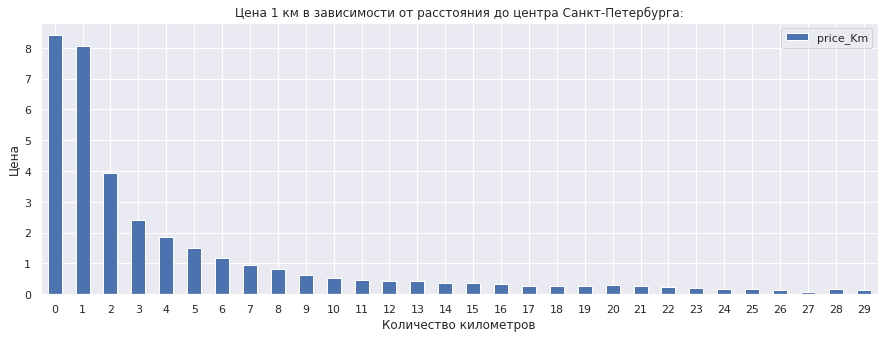

In [113]:
(price_centers_nearest.groupby('center_dist_Km')['price_Km']
                      .agg('mean').reset_index()
                      .plot(kind='bar', 
                            y='price_Km', 
                            figsize=(15,5),
                            rot=0))
plt.title('Цена 1 км в зависимости от расстояния до центра Санкт-Петербурга:')
plt.xlabel("Количество километров")
plt.ylabel("Цена")

print('Описание цены 1 км в зависимости от расстояния до центра Санкт-Петербурга: \n', \
      price_centers_nearest['price_Km'].describe())

По диаграмме видим четкую зависимость цены 1 км. от расстояния до центра Санкт-Петербурга, чем квартира ближе к центру, тем выше цена 1 км. Особенно выделяются различия в цене 1 км в радиусе расстояния от центра 0, 1 и 2 км. Наиболее дорогие квартиры расположены в центре города. При удалении от центра цена снижается.

## Общий вывод

В процессе исследования мы выделили ряд параметров, оказывающих влияние на цену объектов недвижимости:


1. **Типовые характеристики выборки:** 

- Чаще других вариантов предлагаются квартиры в пределах ценового диапазона 3-4,5млн.

- Большинство объектов расположено в радиусе 10-16 тыс.м или 10-16 км от центра города.
- 28% от всех объектов расположены рядом с парками. Большинство квартир находятся в пределах 700 м. И больше всего квартир находятся на расстоянии от парков примерно в 500 метрах.      


- Больше всего предложений с 1 комнатой, чуть меньше с 2 комнатами, на третьем месте квартиры с 3-мя комнатами
- Лидирует 5-ти этажная застройка, на втором месте 9-ти этажная застройка
- Большинство предлагаемых квартир расположены на 1-5 этажах, лидирует 2-й этаж. 
- 73% квартир расположены между первым и последним этажами, 14% на последнем этаже и 13% на - первом этаже.     


- Наиболее часто продают квартиры общей площадью до 60м2
- У большинства предлагаемых квартир жилая площадь не превышает 32 м2
- У большинства предлагаемых квартир площадь кухни не превышает 12 м2


- Объявления публикуют чаще в будние дни, чем в выходные: лидеры - четверг и вторник. Число публикаций в выходные снижается более, чем в 2 раза, относительно будних дней.
- "Любимые" месяцы публикации объявлений - февраль, март, апрель и ноябрь. В летние месяцы публикуют меньше объявлений, аналогичный уровень публикаций в январе и декабре. В течение осенних месяцев снова начинается рост публикаций. Из этих данных можно сделать вывод, в какие периоды повышается количество предложений, а значит больше вариантов для выбора.
- Более дорогие квартиры продавались в 2014 году, с 2014 к 2016 году прослеживается тренд на снижение цены. В 2017 и 2018 годах цены были на одном уровне с 2016 годом, рост виден только в 2019 году.
- Большинство квартир продается в течение 100 дней. Быстрее продаются однокомнатные квартиры, наиболее типичные сроки публикации объявлений для этой группы 79 дней, 2-х комнатные квартиры продаются чаще за 90 дней. 3-х комнатные - за 109 дней.



2. **Влияние параметров на ценообразование:**

- Больше всего объявлений опубликовано в городе Санкт-Петербурге, что логично, т.к. он является самым крупным населенным пунктом региона.

- Наиболее высокая цена за 1 кв.м. в поселке Парголово 197371 руб. Соответственно, на цену влияет **населенный пункт, в котором расположен объект недвижимости**.

- Наиболее дорогие объекты расположены непосредственно в центре города Санкт-Петербурга. При удаленности от центра города цена снижается. Особенно выделяются различия в цене 1 км в радиусе расстояния от центра 0, 1 и 2 км. Т.о, на цену влияет **удаленность квартиры от центра**.



- Из характеристик квартиры на формирование цены больше всего влияют:

    - **общая площадь** жилья, коэффициент корреляции 0,69, особенно заметна эта взаимосвязь до площади ~50 м.кв.
    - **жилая площадь**, коэффициент корреляции 0,57, максимальная взаимосвязь до площади ~30 м.кв.
    - **площадь кухни**, коэффициент корреляции 0,50, больше всего взаимосвязь наблюдается до площади ~10 м.кв. 
    - **количество комнат**, коэффициент 0,43.  Больше комнат в квартире - выше цена.
    - **этаж**. Квартиры на первом этаже имеют более низкую стоимость по сравнению с квартирами на других этажах. Последний этаж стоит ниже, чем квартиры, расположенные на этажах между первым и последним.